In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\MEET\Desktop\programs\Data Analyst Projects\Rohit_Sharma_Centuries.csv', encoding='unicode_escape')

In [3]:
df.shape

(48, 14)

In [31]:
df.head()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,28-05-2010,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
1,2,30-05-2010,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won
2,3,16-10-2013,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won
3,4,2/11/2013,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
4,5,13-11-2014,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won


In [5]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No.             48 non-null     int64  
 1   Date              48 non-null     object 
 2   Score             48 non-null     int64  
 3   Strike Rate       48 non-null     float64
 4   Type of Match     48 non-null     object 
 5   Position          48 non-null     int64  
 6   Innings           48 non-null     int64  
 7   Dismissed         48 non-null     object 
 8   Man of the Match  48 non-null     object 
 9   Captain           48 non-null     object 
 10  Against           48 non-null     object 
 11  Venue             48 non-null     object 
 12  H/A/N             48 non-null     object 
 13  Result            48 non-null     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.4+ KB


In [6]:
# now we will count null value
pd.isnull(df).sum()
#here our all column has 0 null values

S.No.               0
Date                0
Score               0
Strike Rate         0
Type of Match       0
Position            0
Innings             0
Dismissed           0
Man of the Match    0
Captain             0
Against             0
Venue               0
H/A/N               0
Result              0
dtype: int64

In [7]:
df.describe()
# use Describe for specific column
df[['Score','Strike Rate']].describe()

,Score,Strike Rate
count,48.000000,48.000000
mean,134.937500,109.656042
std,34.744298,41.704401
min,100.000000,50.560000
25%,111.000000,85.197500
50%,124.500000,105.710000
75%,147.750000,121.100000
max,264.000000,274.410000


# Exploratory Data Analysis

In [8]:
df.columns

Index(['S.No.', 'Date', 'Score', 'Strike Rate', 'Type of Match', 'Position',
       'Innings', 'Dismissed', 'Man of the Match', 'Captain', 'Against',
       'Venue', 'H/A/N', 'Result'],
      dtype='object')

## We will Go for Type Of Match

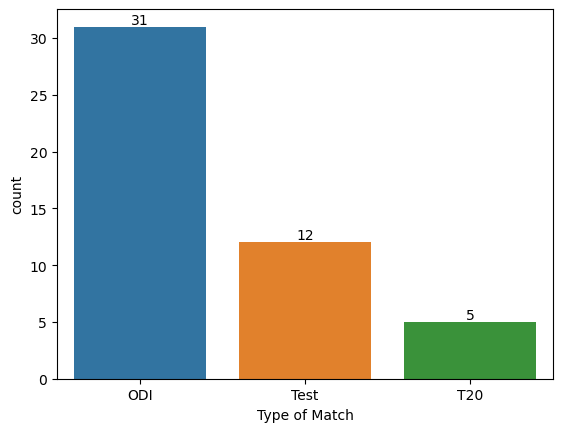

In [9]:
ax= sns.countplot(x='Type of Match' ,data= df)
# if we want a values

for bars in ax.containers:
    ax.bar_label(bars)

In [10]:
df.groupby(['Type of Match'],as_index=False)['Score'].sum().sort_values(by='Score',ascending=False)

,Type of Match,Score
0,ODI,4271
2,Test,1650
1,T20,556


<Axes: xlabel='Type of Match', ylabel='Score'>

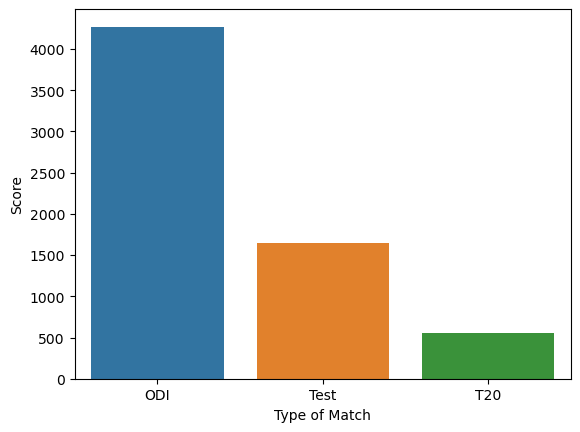

In [11]:
#bar plot
ab=df.groupby(['Type of Match'],as_index=False)['Score'].sum().sort_values(by='Score',ascending=False)
sns.barplot(x='Type of Match',y='Score',data=ab)

# we will go for Man of the Match On which Position

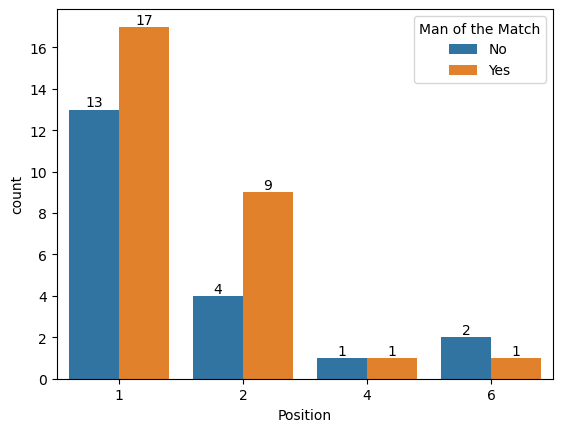

In [12]:

ax=sns.countplot(data=df,x='Position',hue='Man of the Match')

for bars in ax.containers:
    ax.bar_label(bars)

# Score Vs Position

<Axes: xlabel='Position', ylabel='Score'>

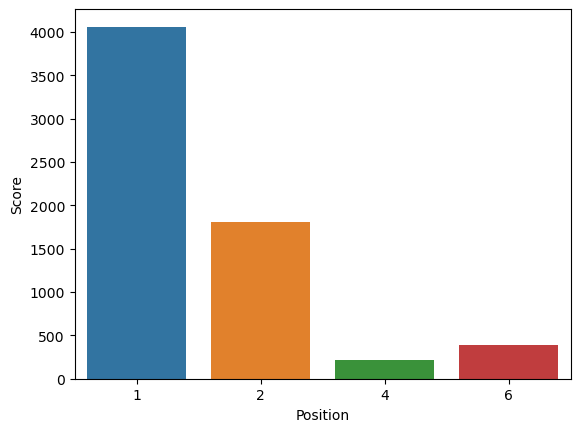

In [13]:
bc=df.groupby(['Position'], as_index=False)['Score'].sum().sort_values(by='Score',ascending=False)
sns.barplot(x='Position',y='Score',data=bc)

# Score Against Country

<Axes: xlabel='Against', ylabel='Score'>

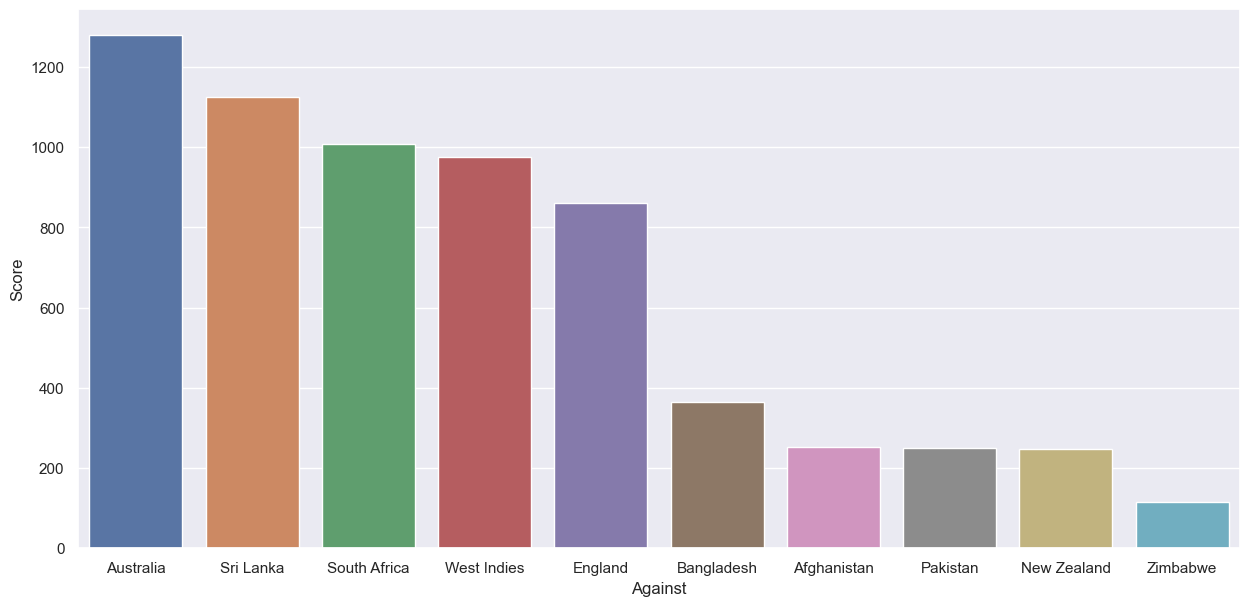

In [14]:
cd=df.groupby(['Against'],as_index=False)['Score'].sum().sort_values(by='Score',ascending=False)
sns.set(rc={'figure.figsize':(15,7)}) #(Height,Weight)
sns.barplot(data=cd,x='Against',y='Score')

# Result On Dismissed By Score

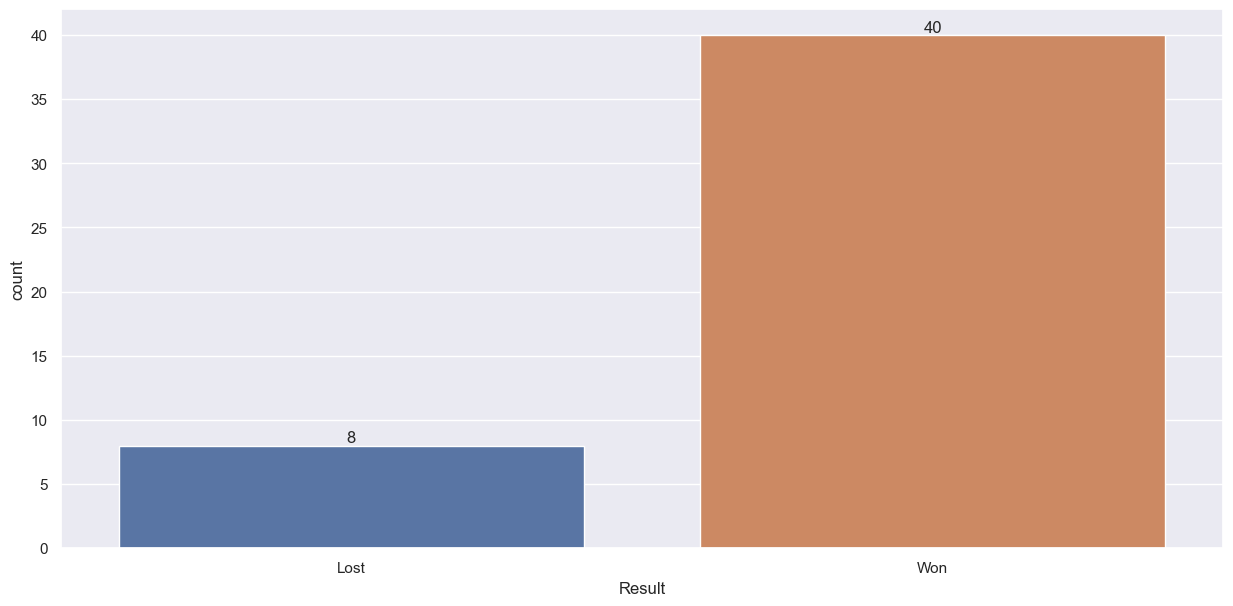

In [15]:
ax=sns.countplot(data=df,x='Result')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Result', ylabel='Score'>

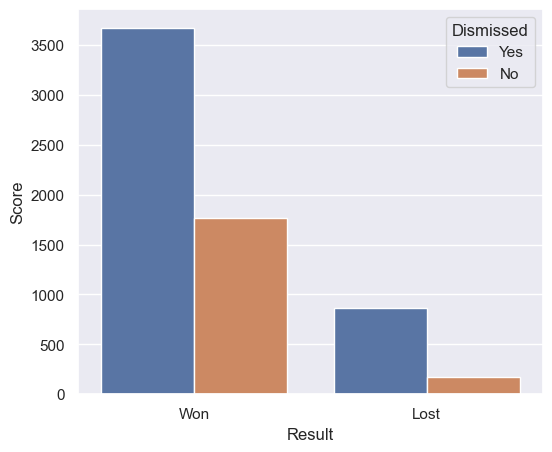

In [16]:
de=df.groupby(['Result','Dismissed'],as_index=False)['Score'].sum().sort_values(by='Score',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=de,x='Result',y='Score',hue='Dismissed')

# Score in Home,Away and Neutral

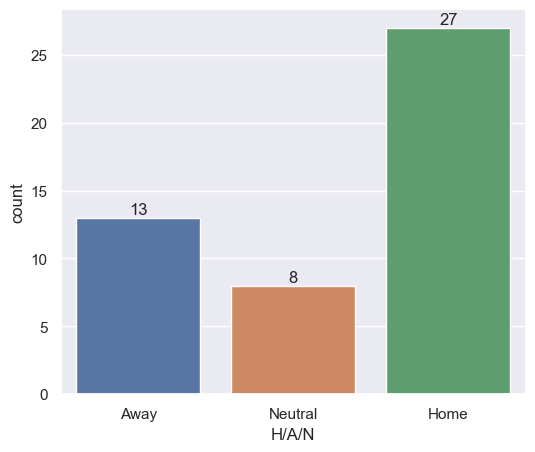

In [17]:
ax=sns.countplot(data=df,x='H/A/N')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='H/A/N', ylabel='Score'>

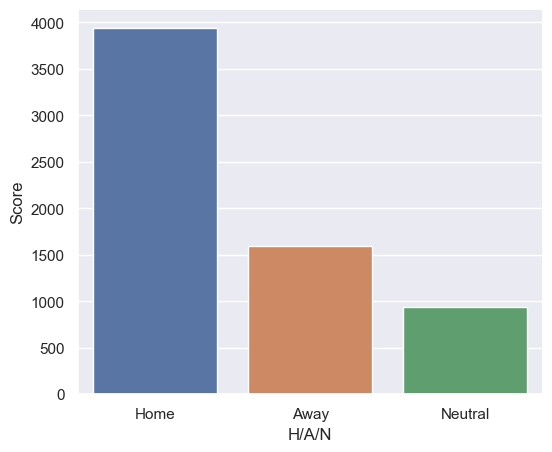

In [18]:
ef=df.groupby(['H/A/N'],as_index=False)['Score'].sum().sort_values(by='Score',ascending=False)
sns.barplot(data=ef,x='H/A/N',y='Score')

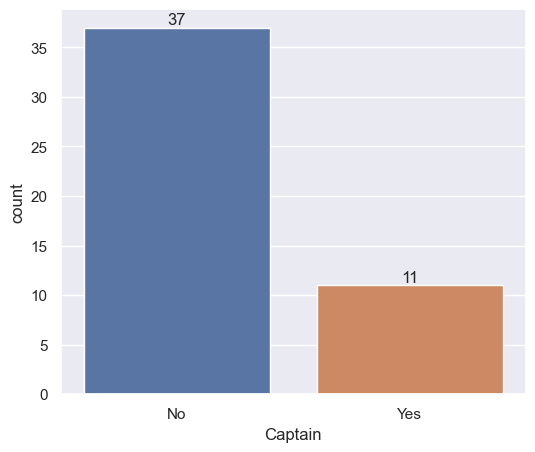

In [19]:
ax=sns.countplot(data=df,x='Captain')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

# Find Strike Rate in Type of Match and Captain

<Axes: xlabel='Type of Match', ylabel='Strike Rate'>

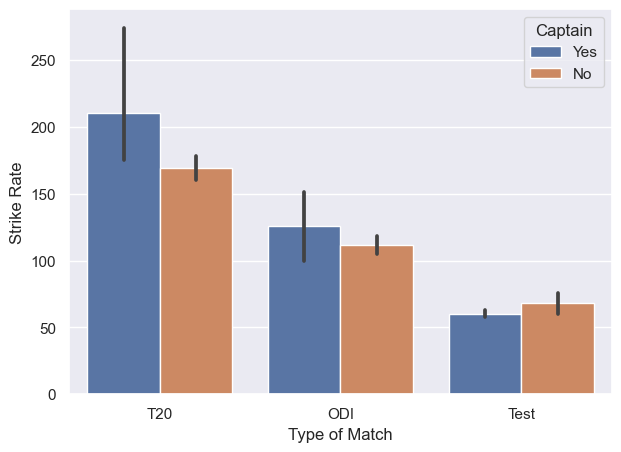

In [20]:
ef=df.groupby(['Strike Rate','Type of Match'],as_index=False)['Captain'].sum().sort_values(by='Captain',ascending=False)
sns.barplot(data=ef,x='Type of Match',y='Strike Rate',hue='Captain')

# Top 10 Venue in order of Score

<Axes: xlabel='Venue'>

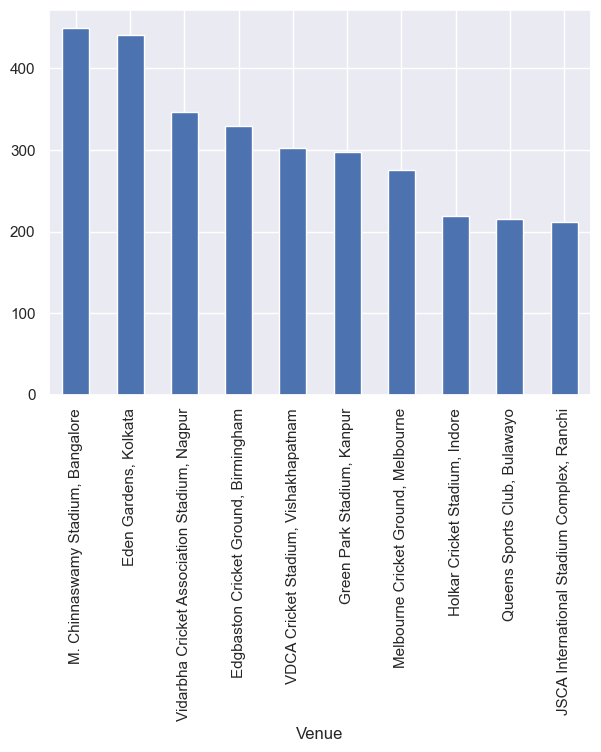

In [21]:
df.groupby('Venue')['Score'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Venue', ylabel='Score'>

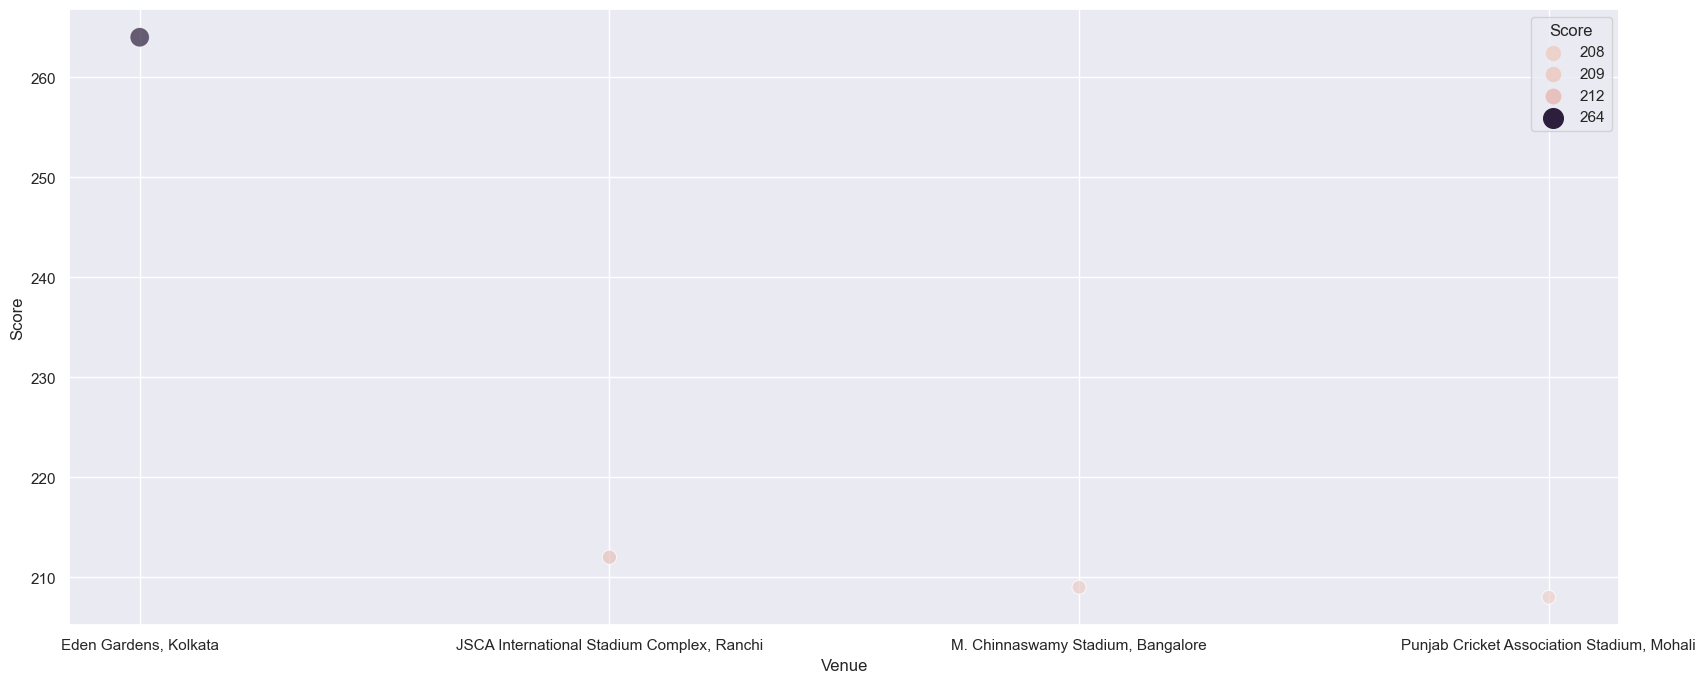

In [83]:
top_4_scores = df.nlargest(4, 'Score')

# Create scatter plot
plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=top_4_scores,  
    x='Venue',
    y='Score',
    hue='Score',  
    size='Score', 
    sizes=(100, 200),  
)